In [34]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def get_loss_files(file_location,pattern):
    lhs_batch_work_dir=file_location
    filenames=os.listdir(lhs_batch_work_dir)
    lhs_lpi_batch=pd.DataFrame()
    for i in filenames:
        if len(re.findall(pattern,i))!=0:
            data=pd.read_csv(lhs_batch_work_dir+i,index_col=0)
            lhs_lpi_batch=pd.concat([lhs_lpi_batch,data],axis=1)
    return lhs_lpi_batch

def format_data(experiment):
    #seeks runs where the training process failed
    # and removes NA values
    n_experiment=np.shape(experiment)[1]
    experiment.columns=np.arange(n_experiment)
    failed=np.where(experiment==-1)[1]
    failed=[str(i) for i in failed]

    exclude=np.setdiff1d(experiment.columns.to_list(),failed)
    experiment=experiment.filter(items=list(exclude),axis=1)

    experiment.fillna(0,inplace=True)
    n_experiment=np.shape(experiment)[1]
    # print(n_experiment)
    return n_experiment,experiment


IndentationError: expected an indented block (3757223884.py, line 47)

In [35]:



lhs_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_loss_per")
nrows_monod,ncols_monod=np.shape(lhs_lpi_monod)
failed_monod=np.where(lhs_lpi_monod==-1)[1]
n_lhs_lpi_monod,lhs_lpi_monod=format_data(lhs_lpi_monod)



lhs_lpi_batch=get_loss_files("../results/batch/lhs/",pattern="batch_run\d_loss_per")
nrows_batch,ncols_batch=np.shape(lhs_lpi_batch)

failed_batch=np.where(lhs_lpi_batch==-1)[1]
n_lhs_lpi_batch,lhs_lpi_batch=format_data(lhs_lpi_batch)


lhs_lpi_simple_sbml=get_loss_files("../results/simple_sbml/lhs/",pattern="simple_sbml_run\d_loss_per")
nrows_simplesbml,ncols_simplesbml=np.shape(lhs_lpi_simple_sbml)
failed_simple=np.where(lhs_lpi_simple_sbml==-1)[1]
n_lhs_lpi_simple_sbml,lhs_lpi_simple_sbml=format_data(lhs_lpi_simple_sbml)


lhs_lpi_BIOMD0000000458=get_loss_files("../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_loss_per")
nrows_BIOMD0000000458,ncols_BIOMD0000000458=np.shape(lhs_lpi_BIOMD0000000458)
failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
n_lhs_lpi_BIOMD0000000458,lhs_lpi_BIOMD0000000458=format_data(lhs_lpi_BIOMD0000000458)

lhs_lpi_BIOMD0000000507=get_loss_files("../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run\d_loss_per")
nrows_BIOMD0000000507,ncols_BIOMD0000000507=np.shape(lhs_lpi_BIOMD0000000507)
failed_BIOMD0000000507=np.where(lhs_lpi_BIOMD0000000507==-1)[1]
n_lhs_lpi_BIOMD0000000507,lhs_lpi_BIOMD0000000507=format_data(lhs_lpi_BIOMD0000000507)


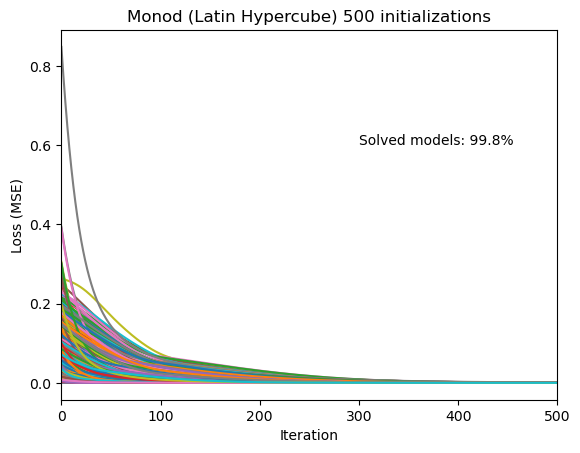

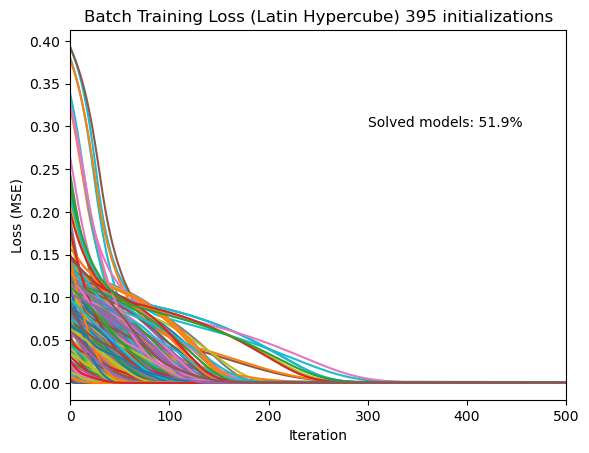

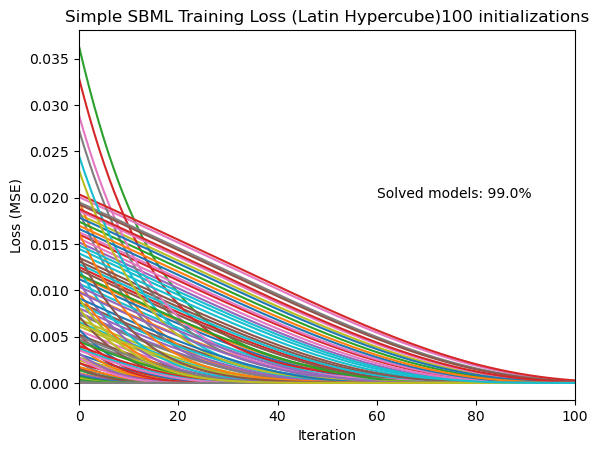

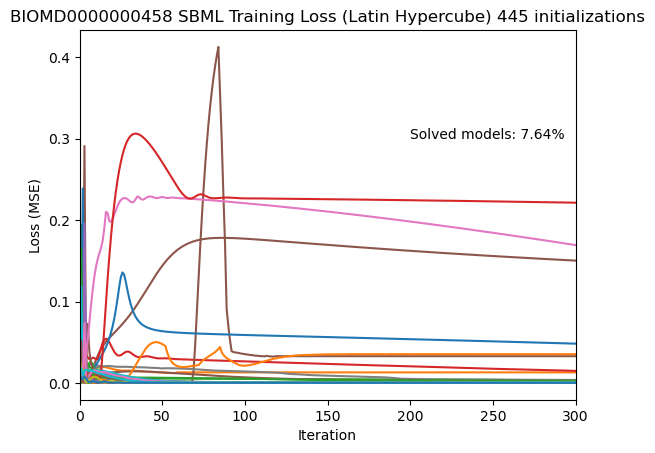

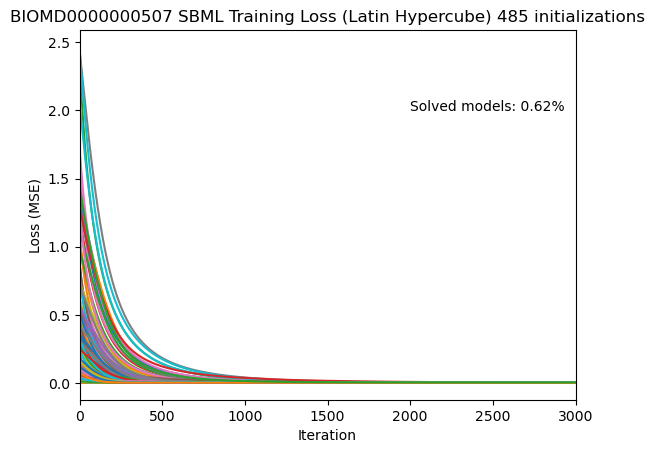

In [36]:
fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_monod)[1]):
    ax.plot(lhs_lpi_monod.iloc[:,i])#$, color=plt.cm.Reds(i))

succeeded=np.sum(lhs_lpi_monod.iloc[nrows_monod-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_monod*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
plt.title("Monod (Latin Hypercube) "+ str(ncols_monod)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.6))
plt.show()




fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_batch)[1]):
    ax.plot(lhs_lpi_batch.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_batch.iloc[nrows_batch-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_batch*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
# plt.title("Batc (Latin Hypercube) "+ str(n_lhs_lpi_monod)+" initializations")
plt.title("Batch Training Loss (Latin Hypercube) "+ str(ncols_batch)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.3))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_simple_sbml)[1]):
    ax.plot(lhs_lpi_simple_sbml.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_simple_sbml.iloc[nrows_simplesbml-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_simplesbml*100,2)
annotation="Solved models: "+str(succeeded)+ "%"

plt.title("Simple SBML Training Loss (Latin Hypercube)"+ str(ncols_simplesbml)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,100)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(60,0.02))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000458)[1]):
    ax.plot(lhs_lpi_BIOMD0000000458.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_BIOMD0000000458*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("BIOMD0000000458 SBML Training Loss (Latin Hypercube) "+ str(ncols_BIOMD0000000458)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,300)
# plt.yscale("symlog")
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(200,0.3))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000507)[1]):
    ax.plot(lhs_lpi_BIOMD0000000507.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/ncols_BIOMD0000000507*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("BIOMD0000000507 SBML Training Loss (Latin Hypercube) "+ str(ncols_BIOMD0000000507)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,3000)
# plt.yscale("symlog")
# plt.ylim(0,1)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(2000,2))
plt.show()


In [37]:
params_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_optim")
# all_params=params_lpi_monod.iloc[0:9,:]
print(np.shape(params_lpi_monod))

pca_monod=PCA(n_components=2)
x_monod=pca_monod.fit_transform(params_lpi_monod.T)

params_lpi_batch=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_optim")
params_lpi_batch.drop(params_lpi_batch.columns[failed_batch],axis=1)
print(np.shape(params_lpi_batch))
# all_params=all_params.drop(all_params.columns[[28,29]],axis=1)
pca_batch=PCA(n_components=2)
x_batch=pca_batch.fit_transform(params_lpi_batch.T)



params_lpi_BIOMD0000000458=get_loss_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_optim")

succeeded=list(np.sum(lhs_lpi_BIOMD0000000458.iloc[nrows_BIOMD0000000458-1:,:]==0).keys())
params_lpi_BIOMD0000000458=params_lpi_BIOMD0000000458.iloc[:,succeeded]
params_lpi_BIOMD0000000458=params_lpi_BIOMD0000000458.dropna(axis=1)
print(np.shape(params_lpi_BIOMD0000000458))
pca_BIOMD0000000458=PCA(n_components=2)
x_BIOMD0000000458=pca_BIOMD0000000458.fit_transform(params_lpi_BIOMD0000000458.T)



params_lpi_BIOMD0000000507=get_loss_files(file_location="../results/BIOMD0000000507/lhs/",pattern="BIOMD0000000507_run\d_optim")
succeeded=list(np.sum(lhs_lpi_BIOMD0000000507.iloc[nrows_BIOMD0000000507-1:,:]==0).keys())
params_lpi_BIOMD0000000507=params_lpi_BIOMD0000000507.iloc[:,succeeded]
params_lpi_BIOMD0000000507=params_lpi_BIOMD0000000507.dropna(axis=1)
print(np.shape(params_lpi_BIOMD0000000507))
pca_BIOMD0000000507=PCA(n_components=2)
x_BIOMD0000000507=pca_BIOMD0000000507.fit_transform(params_lpi_BIOMD0000000507.T)

(9, 500)
(4, 395)
(10, 64)
(7, 213)


0.8528429836099531
0.9067908072112644
0.711231202810357
0.9996357779045777


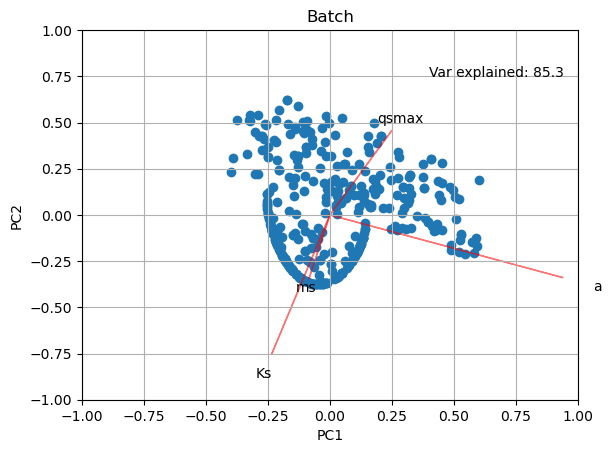

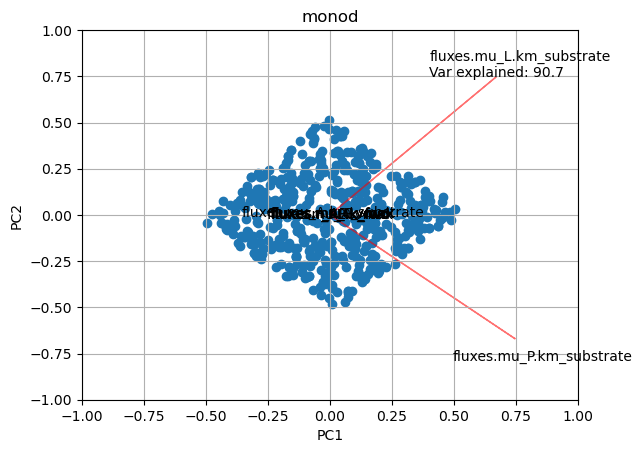

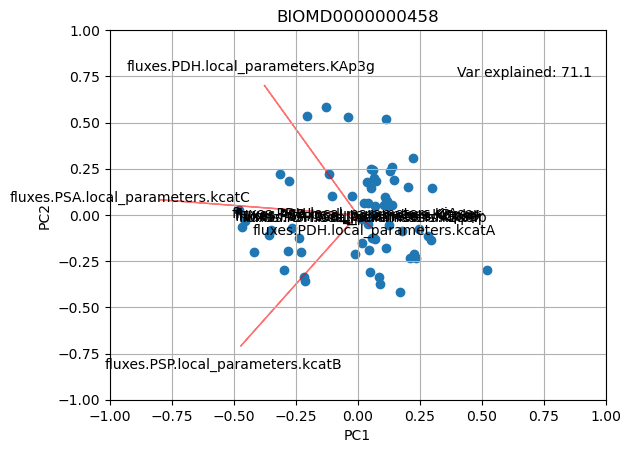

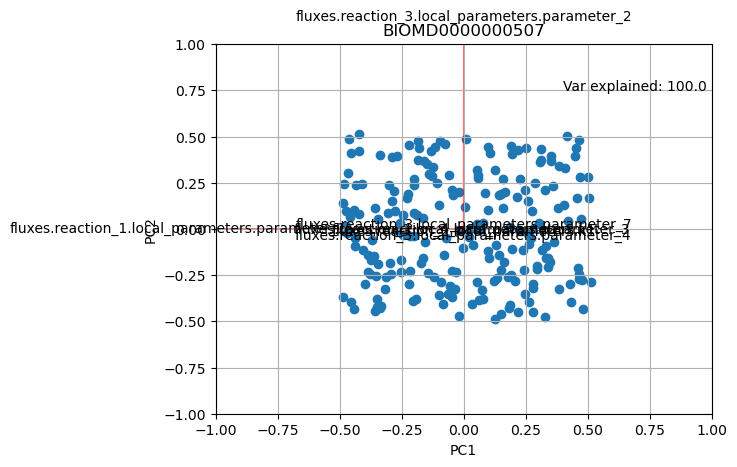

In [39]:
print(sum(pca_batch.explained_variance_ratio_))
print(sum(pca_monod.explained_variance_ratio_))
print(sum(pca_BIOMD0000000458.explained_variance_ratio_))
print(sum(pca_BIOMD0000000507.explained_variance_ratio_))

def myplot(score,coeff,labels,title,var_explained):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1]*1.15 , "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.title(title)
    plt.annotate("Var explained: "+str(np.round(var_explained,3)*100),xy=(0.4,0.75))
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


var_explained_batch=sum(pca_batch.explained_variance_ratio_)
var_explained_monod=sum(pca_monod.explained_variance_ratio_)
var_explained_BIOMD0000000458=sum(pca_BIOMD0000000458.explained_variance_ratio_)
var_explained_BIOMD0000000507=sum(pca_BIOMD0000000507.explained_variance_ratio_)

myplot(score=x_batch[:,0:2],
       coeff=np.transpose(pca_batch.components_[0:2, :]),
       labels=list(params_lpi_batch.index),
       title="Batch",
       var_explained=var_explained_batch)
plt.show()

myplot(score=x_monod[:,0:2],
       coeff=np.transpose(pca_monod.components_[0:2, :]),
       labels=list(params_lpi_monod.index),
       title="monod",
       var_explained=var_explained_monod)
plt.show()


myplot(score=x_BIOMD0000000458[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000458.components_[0:2, :]),
       labels=list(params_lpi_BIOMD0000000458.index),
       title="BIOMD0000000458",
       var_explained=var_explained_BIOMD0000000458)
plt.show()


myplot(score=x_BIOMD0000000507[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000507.components_[0:2, :]),
       labels=list(params_lpi_BIOMD0000000507.index),
       title="BIOMD0000000507",
       var_explained=var_explained_BIOMD0000000507)
plt.show()
# myplot(x_monod[:,0:2],np.transpose(pca_monod.components_[0:2, :]),labels=list(params_lpi_monod.index))



In [7]:
params_lpi_BIOMD0000000507

,0,4,1,2,0,1,1,2,4,0,...,3,4,0,1,2,0,2,3,1,2
fluxes.reaction_1.local_parameters.parameter_1,89.311100,202.289410,295.601600,196.668080,235.200320,87.461710,177.846950,120.614640,126.604385,183.415310,...,240.262880,215.940950,88.145510,235.220780,130.715150,141.548110,126.138145,128.500200,102.271620,227.894620
fluxes.reaction_1.local_parameters.parameter_3,4.932330,3.047004,3.861524,2.409727,3.337072,2.085269,1.981685,4.439741,2.364819,1.838634,...,2.484349,4.922828,2.061206,3.847162,4.509442,4.235939,2.298333,2.856362,2.132485,3.275908
fluxes.reaction_2.local_parameters.k1,1.281218,0.953880,1.077995,1.016270,0.934515,0.866661,0.661101,0.969801,1.004610,1.773972,...,1.255586,1.555777,0.733660,1.171265,1.501329,0.570554,0.975828,1.676415,0.831103,1.126398
fluxes.reaction_3.local_parameters.parameter_2,13.500459,23.598417,28.662542,21.780422,27.502918,20.334946,23.558464,15.486458,19.798800,18.942636,...,29.925673,15.757094,25.643545,15.315614,24.909134,16.489239,27.383278,14.398669,26.709608,28.726640
fluxes.reaction_3.local_parameters.parameter_4,1.425257,1.327732,0.902212,1.754955,1.156579,0.410171,1.392162,1.195219,0.701120,1.183004,...,0.764969,1.161052,1.137499,1.254722,1.925161,1.470515,0.622377,0.763904,0.117676,0.380666
fluxes.reaction_3.local_parameters.parameter_7,-0.000790,0.408085,0.332646,-0.000451,0.401911,0.300971,-0.000471,-0.000492,0.360159,-0.000943,...,0.465482,-0.000653,0.610883,-0.000181,-0.000681,-0.000917,0.902389,-0.000689,0.087204,0.422260
fluxes.reaction_4.local_parameters.k1,1.515840,1.172630,1.364189,1.693629,1.333347,0.796635,1.730239,1.555209,0.840778,1.309919,...,1.246598,1.584891,1.057529,1.889407,1.863318,1.486027,0.899179,1.418700,0.981584,1.071347
